In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pimadatacsv/pima-data.csv
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
#Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("../input/pimadatacsv/pima-data.csv")

In [4]:
data.shape

(768, 10)

In [5]:
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [6]:
#FE: 
#Step1  : Check for Null values in data set 

data.isnull().values.any()

False

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')


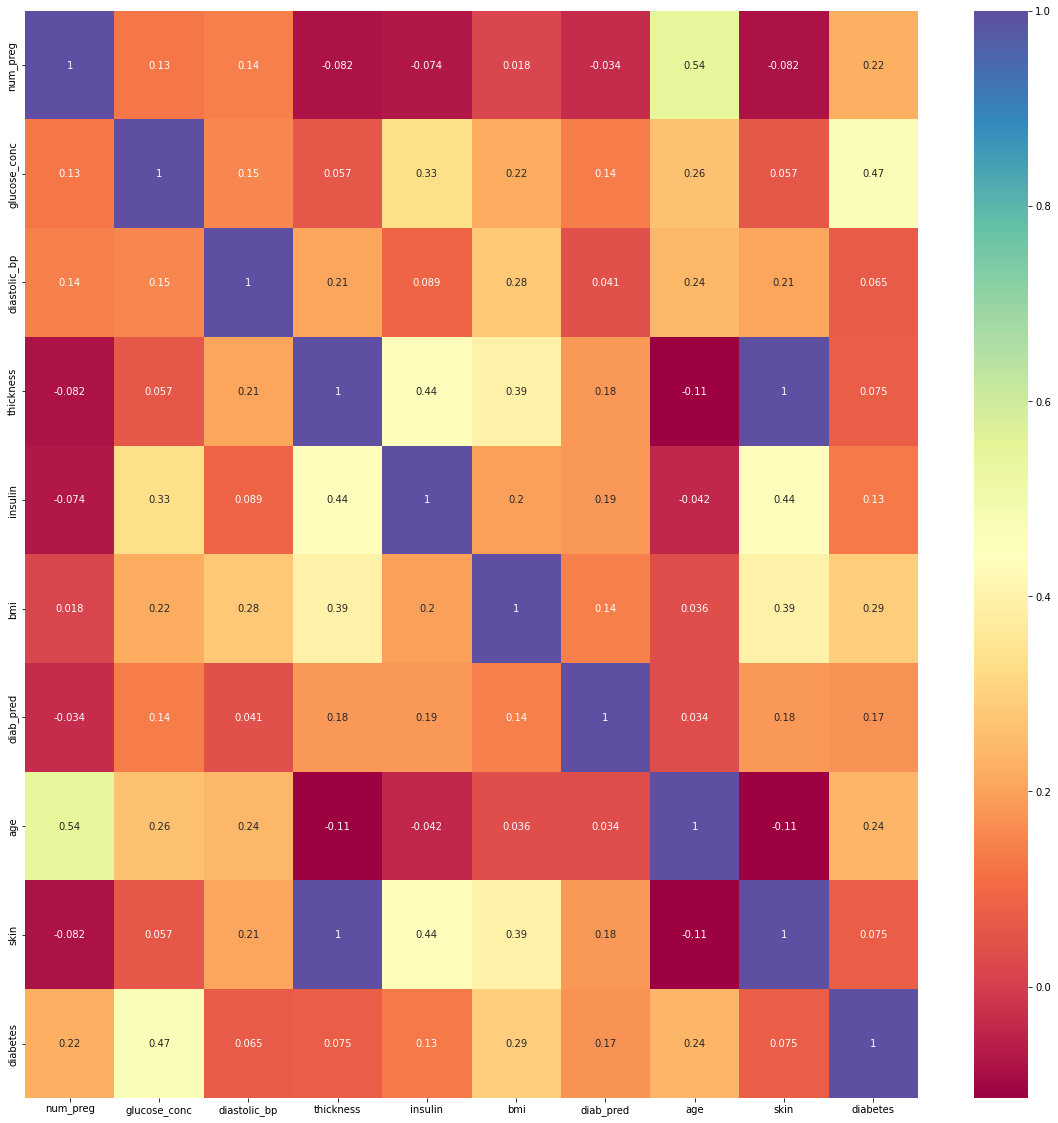

In [7]:
#Step 2: Find correlation
import seaborn as sns
import matplotlib.pyplot as plt
#plot correlations of each features in dataset

#corrrelation Matrix
corrmat=data.corr()
print(corrmat.index)

#headers -> fields/colums, use.index
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heat map use seaborn 
#plot_color_gradients('Diverging',
#['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Spectral")


In [8]:
data.corr()

#corr between -1 to +1

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
#Convert Diabetes (Output feature to 0 and 1 from true and false)
#create mapping function

diabetes_map={True:1,False:0}

In [10]:
#replace actual with mapped values 

data['diabetes']=data['diabetes'].map(diabetes_map)

In [11]:
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


In [12]:
#Check if data set is balanced or not 
diabetes_true_count=len(data.loc[data['diabetes']==True])
diabetes_false_count=len(data.loc[data['diabetes']==False])

In [13]:
(diabetes_true_count,diabetes_false_count)
#1:2 ratio 

(268, 500)

In [14]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [15]:
# Use Train Test Split 

from sklearn.model_selection import train_test_split
feature_columns=['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [16]:
X = data[feature_columns].values
Y = data[predicted_class].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.20, random_state=10)

In [17]:
#Rows which have zeros
print("total number of rows : {0}".format(len(data)))
print("number of rows missing(zeros) num_preg: {0}".format(len(data.loc[data['num_preg'] == 0])))
print("number of rows missing(zeros) glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing(zeros) diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing(zeros) thickness: {0}".format(len(data.loc[data['thickness'] == 0])))
print("number of rows missing(zeros) insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing(zeros) bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing(zeros) diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing(zeros) age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing(zeros) skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing(zeros) num_preg: 111
number of rows missing(zeros) glucose_conc: 5
number of rows missing(zeros) diastolic_bp: 35
number of rows missing(zeros) thickness: 227
number of rows missing(zeros) insulin: 374
number of rows missing(zeros) bmi: 11
number of rows missing(zeros) diab_pred: 0
number of rows missing(zeros) age: 0
number of rows missing(zeros) skin: 227


In [18]:
# from sklearn.preprocessing import Imputer -- Deprecated 
#Steps:
#! pip install -U scikit-learn
#pip install -U scikit-learn
#Use SimpleImputer

In [19]:
#imputor, stats function to replace 0 value with mean value 

from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

fill_values= SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)


In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train,Y_train.ravel())

RandomForestClassifier(random_state=10)

In [21]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print ("Accuracy is ={0:.3f}".format(metrics.accuracy_score(Y_test,predict_train_data)))

Accuracy is =0.734
